In [280]:
import pandas as pd
import plotnine as pn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [281]:
df = pd.read_csv("Sample - Superstore.csv", encoding_errors='ignore')

In [282]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Exploratory Analysis


## Order Date

In [283]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [284]:
df["Order Date"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


count                    9994
unique                   1237
top       2016-09-05 00:00:00
freq                       38
first     2014-01-03 00:00:00
last      2017-12-30 00:00:00
Name: Order Date, dtype: object

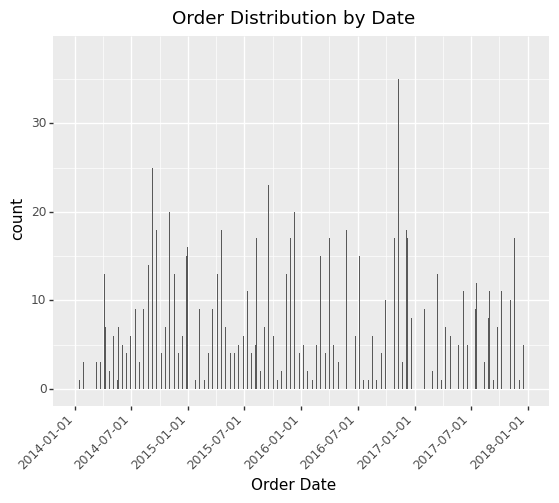

<ggplot: (8770514573109)>

In [285]:
(
    pn.ggplot(df, pn.aes(x="Order Date"))
    + pn.geom_histogram(binwidth=0.25)
    + pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1))
    + pn.ggtitle("Order Distribution by Date")
)

### Check Seasonal Distribution


In [286]:
df["year"] = pd.DatetimeIndex(df["Order Date"]).year
df["month"] = pd.Categorical(pd.DatetimeIndex(df["Order Date"]).month)
df["month_num"] = pd.DatetimeIndex(df["Order Date"]).month
df["dayofweek"] = pd.Categorical(pd.DatetimeIndex(df["Order Date"]).dayofweek)
df["dayofweek_num"] = pd.DatetimeIndex(df["Order Date"]).dayofweek

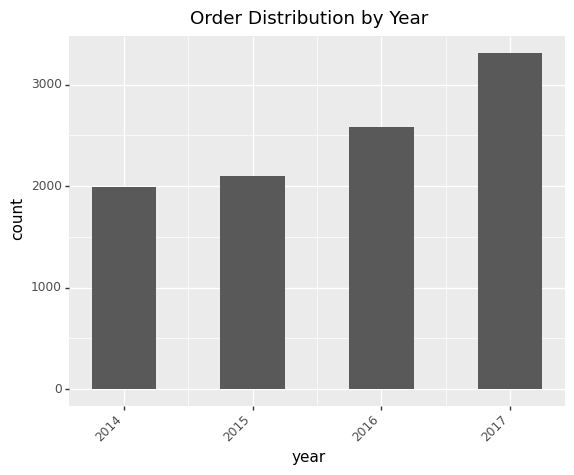

<ggplot: (8770515665757)>

In [287]:
(
    pn.ggplot(df, pn.aes(x="year"))
    + pn.geom_histogram(binwidth=0.5)
    + pn.ggtitle("Order Distribution by Year")
    + pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1))
)

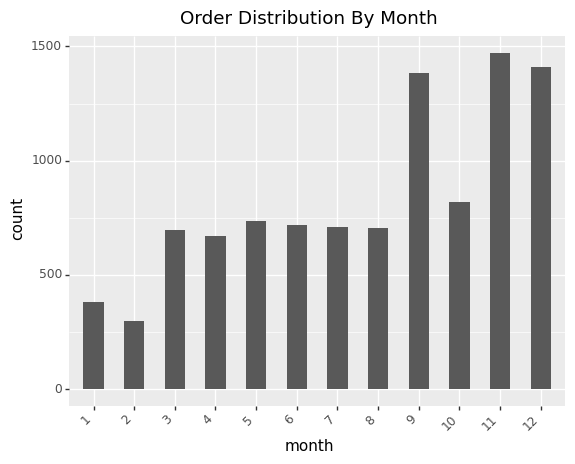

<ggplot: (8770517694697)>

In [288]:
(
    pn.ggplot(df, pn.aes(x="month"))
    + pn.geom_histogram(binwidth=0.5)
    + pn.ggtitle("Order Distribution By Month")
    + pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1))
)

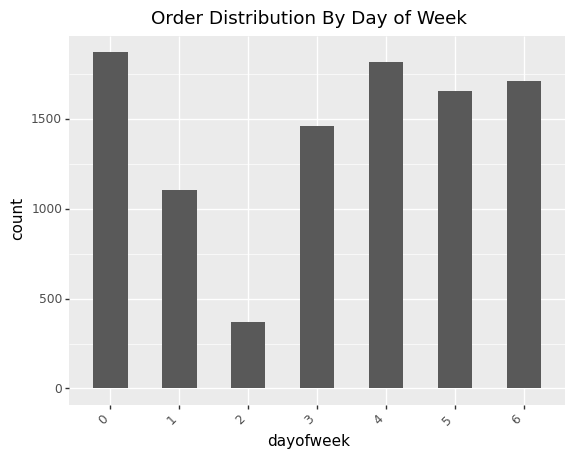

<ggplot: (8770514986209)>

In [289]:
(
    pn.ggplot(df, pn.aes(x="dayofweek"))
    + pn.geom_histogram(binwidth=0.5)
    + pn.ggtitle("Order Distribution By Day of Week")
    + pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1))
)

## Ship Date

In [290]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [291]:
df["Order to Ship Time"] = df["Ship Date"] - df["Order Date"]

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 38'. Pick better value with 'binwidth'.
/usr/local/lib/python3.7/dist-packages/plotnine/positions/position.py:204: PlotnineWarning: position_stack requires non-overlapping x intervals


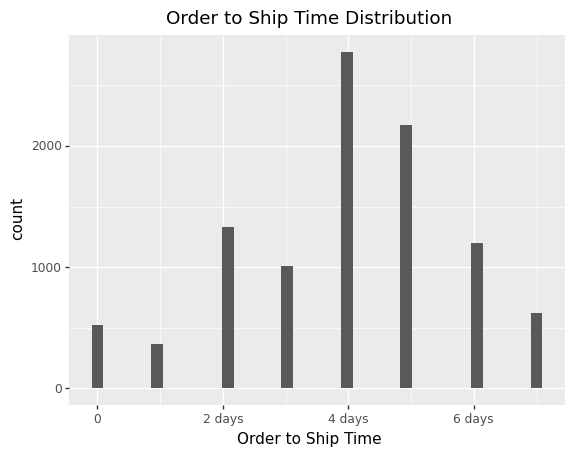

<ggplot: (8770516868181)>

In [292]:
(
    pn.ggplot(df, pn.aes(x="Order to Ship Time"))
    + pn.geom_histogram()
    + pn.ggtitle("Order to Ship Time Distribution")
)

## Ship Mode

In [293]:
df["Ship Mode"].describe()

count               9994
unique                 4
top       Standard Class
freq                5968
Name: Ship Mode, dtype: object

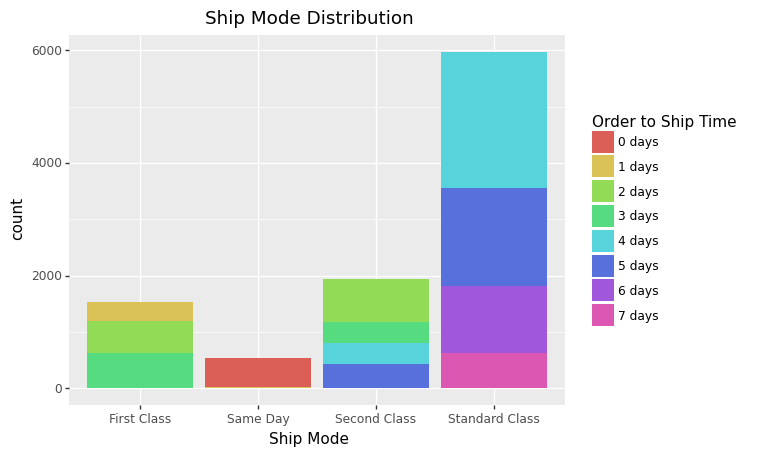

<ggplot: (8770517746801)>

In [294]:
df["Order to Ship Time cat"] = pd.Categorical((df["Order to Ship Time"] / np.timedelta64(1, 'D'))
.map(lambda x : f"{int(x)} days"))
(
    pn.ggplot(df)
    + pn.aes(x="Ship Mode", fill="Order to Ship Time cat")
    + pn.geom_bar()
    + pn.labs(fill="Order to Ship Time")
    + pn.ggtitle("Ship Mode Distribution")
)

In [295]:
ship_mode_nums = {"First Class":1, "Same Day":0, "Second Class":2, "Standard Class":3}
ship_mode_num = df["Ship Mode"].replace(ship_mode_nums)
df["ship_mode_num"] = ship_mode_num

## Segment


In [296]:
df["Segment"].describe()

count         9994
unique           3
top       Consumer
freq          5191
Name: Segment, dtype: object

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 22'. Pick better value with 'binwidth'.


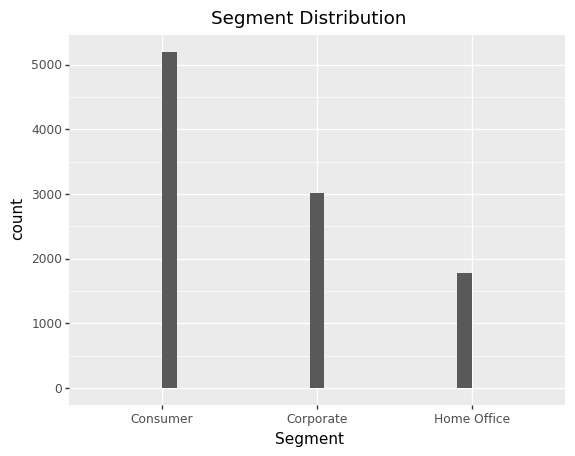

<ggplot: (8770517033401)>

In [297]:
(
    pn.ggplot(df, pn.aes(x="Segment"))
    + pn.geom_histogram()
    + pn.ggtitle("Segment Distribution")
)

Give `Segment` a one-hot encoding to make correlation easier to check

In [298]:
df["Segment_num"], uniques = pd.factorize(df["Segment"])

## Location

In [299]:
df[["Country", "City", "State", "Postal Code", "Region"]].sample(10)

,Country,City,State,Postal Code,Region
6610,United States,Los Angeles,California,90049,West
4099,United States,Minneapolis,Minnesota,55407,Central
9467,United States,New York City,New York,10024,East
4958,United States,Carrollton,Texas,75007,Central
6524,United States,Philadelphia,Pennsylvania,19120,East
7303,United States,Boynton Beach,Florida,33437,South
3819,United States,New York City,New York,10024,East
1985,United States,Brentwood,California,94513,West
9979,United States,Los Angeles,California,90032,West
481,United States,San Diego,California,92024,West


In [300]:
df["Country"].describe()

count              9994
unique                1
top       United States
freq               9994
Name: Country, dtype: object

There is only 1 country (United States), so it contains no useful information

In [301]:
df["State"].describe()

count           9994
unique            49
top       California
freq            2001
Name: State, dtype: object

In [302]:
df["State"].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [303]:
state_list = df["State"].value_counts().sort_values(ascending=True).index.tolist()
df["State_cat"] = pd.Categorical(df["State"], categories=state_list)

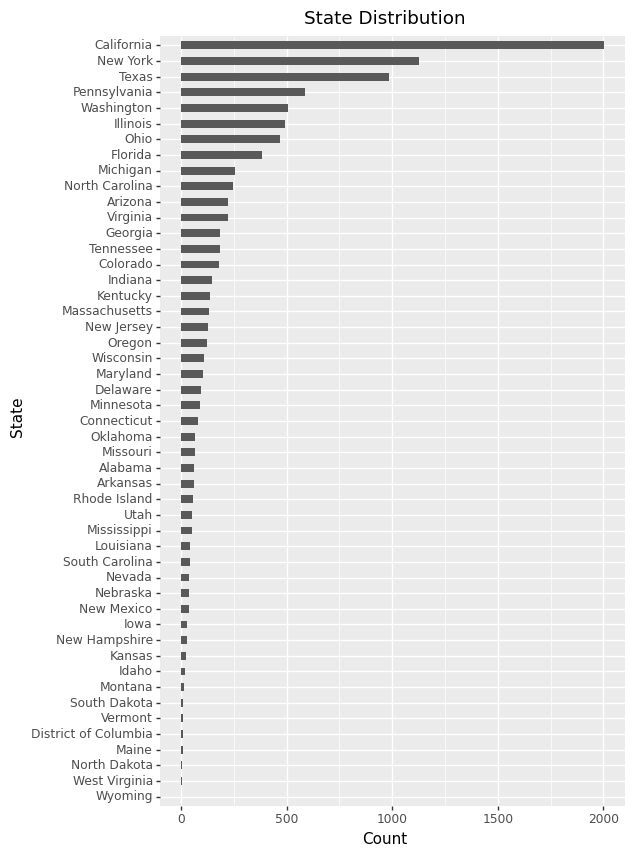

<ggplot: (8770522117217)>

In [304]:

(
    pn.ggplot(df)
    + pn.aes(x="State_cat")
    + pn.geom_histogram(binwidth=0.5)
    + pn.coord_flip()
    + pn.theme(figure_size=(6, 10))
    + pn.labs(x="State", y="Count", title="State Distribution")
)

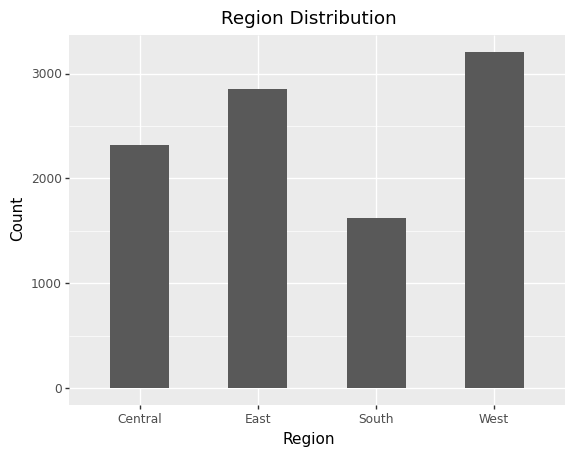

<ggplot: (8770514518945)>

In [305]:
(
    pn.ggplot(df)
    + pn.aes(x="Region")
    + pn.geom_histogram(binwidth=0.5)
    + pn.labs(x="Region", y="Count", title="Region Distribution")
)

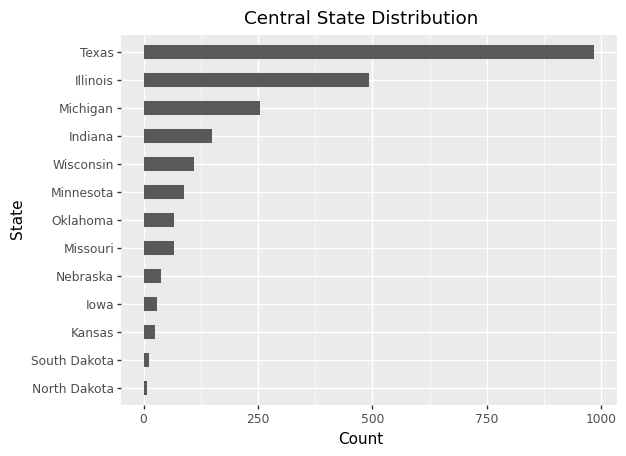

<ggplot: (8770513701677)>

In [306]:
(
    pn.ggplot(df.loc[df["Region"]=="Central"])
    + pn.aes(x="State_cat")
    + pn.geom_histogram(binwidth=0.5)
    + pn.coord_flip()
    + pn.labs(x="State", y="Count", title="Central State Distribution")
)

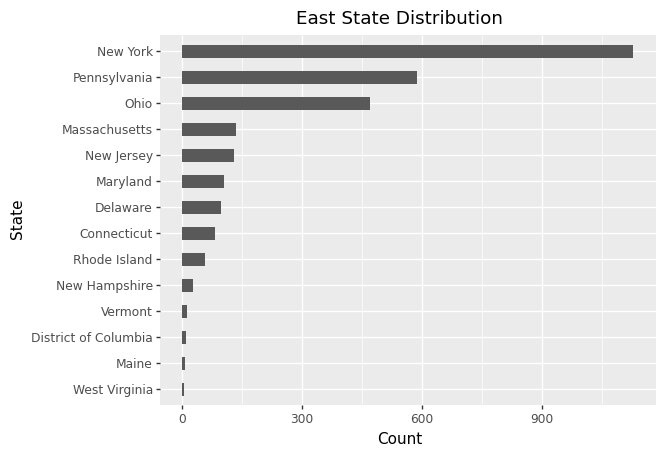

<ggplot: (8770514613769)>

In [307]:
(
    pn.ggplot(df.loc[df["Region"]=="East"])
    + pn.aes(x="State_cat")
    + pn.geom_histogram(binwidth=0.5)
    + pn.coord_flip()
    + pn.labs(x="State", y="Count", title="East State Distribution")
)

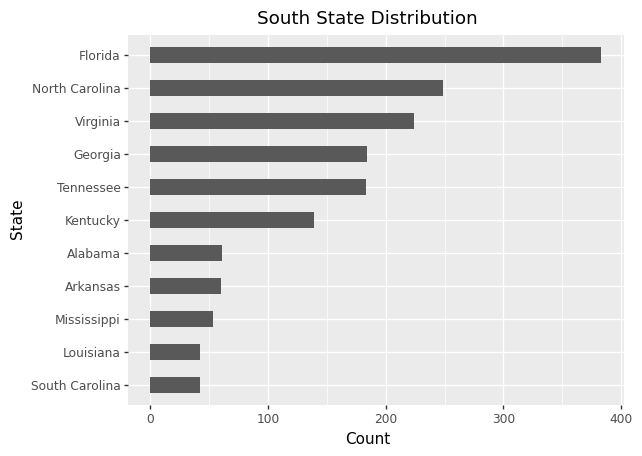

<ggplot: (8770513663393)>

In [308]:
(
    pn.ggplot(df.loc[df["Region"]=="South"])
    + pn.aes(x="State_cat")
    + pn.geom_histogram(binwidth=0.5)
    + pn.coord_flip()
    + pn.labs(x="State", y="Count", title="South State Distribution")
)

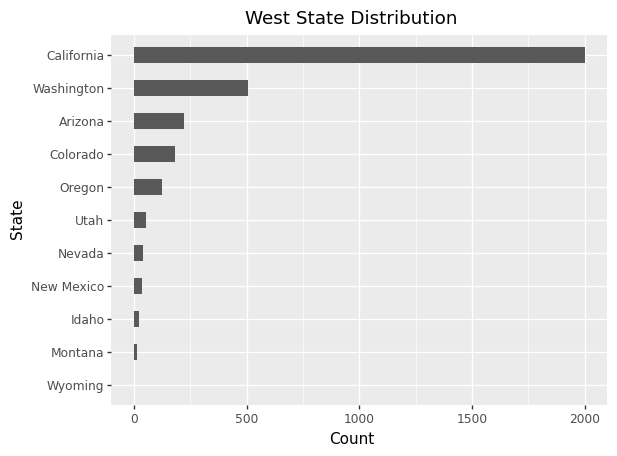

<ggplot: (8770513576033)>

In [309]:
(
    pn.ggplot(df.loc[df["Region"]=="West"])
    + pn.aes(x="State_cat")
    + pn.geom_histogram(binwidth=0.5)
    + pn.coord_flip()
    + pn.labs(x="State", y="Count", title="West State Distribution")
)

## Product Category, Sub-Category, and Name

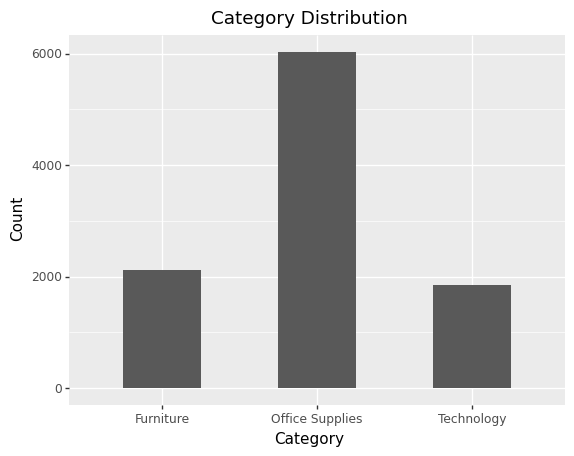

<ggplot: (8770517063869)>

In [310]:
(
    pn.ggplot(df)
    + pn.aes(x="Category")
    + pn.geom_histogram(binwidth=0.5)
    + pn.labs(x="Category", y="Count", title="Category Distribution")
)

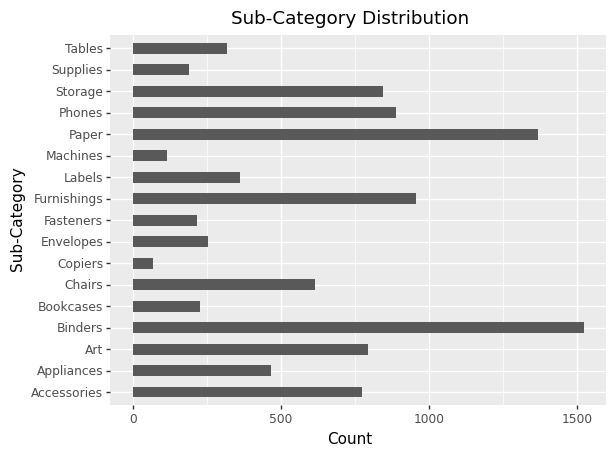

<ggplot: (8770513732441)>

In [311]:
(
    pn.ggplot(df)
    + pn.aes(x="Sub-Category")
    + pn.geom_histogram(binwidth=0.5)
    + pn.coord_flip()
    + pn.labs(x="Sub-Category", y="Count", title="Sub-Category Distribution")
)

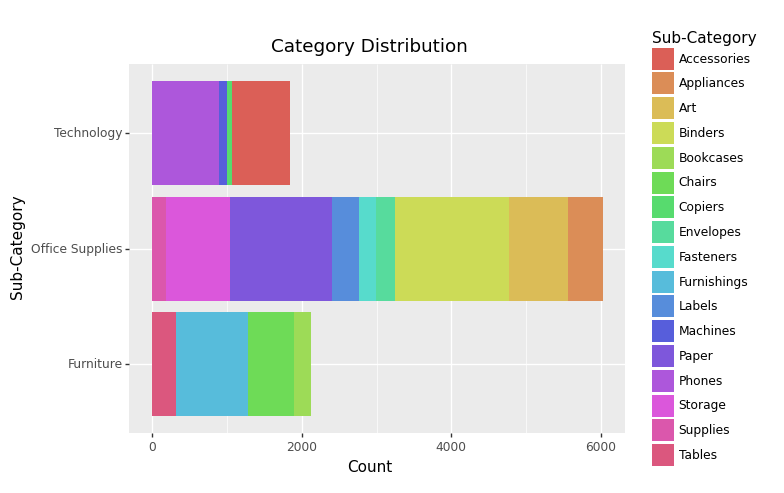

<ggplot: (8770517743345)>

In [312]:
(
    pn.ggplot(df)
    + pn.aes(x="Category", fill="Sub-Category")
    + pn.geom_bar()
    + pn.coord_flip()
    + pn.labs(x="Sub-Category", y="Count", title="Category Distribution")
)

In [313]:
df["Product Name"].sample(10)

732     Carina Double Wide Media Storage Towers in Nat...
9930    Universal Recycled Hanging Pressboard Report B...
5217                                           Xerox 1883
484                Alphabetical Labels for Top Tab Filing
683             Cubify CubeX 3D Printer Triple Head Print
7559                                           Xerox 1934
261     Eureka Disposable Bags for Sanitaire Vibra Gro...
7771     GBC Ibimaster 500 Manual ProClick Binding System
9396                                            Avery 485
4086    Wilson Jones Leather-Like Binders with DublLoc...
Name: Product Name, dtype: object

Give `Categories` and `Sub-Categories` a simple encoding to make correlation easier to check

In [314]:
df["Category_num"], uniques = pd.factorize(df["Category"])
df["Sub-Category_num"], uniques = pd.factorize(df["Sub-Category"])

## Sales, Quantity, Discount, and Profit

In [315]:
df[["Sales", "Quantity", "Discount", "Profit"]].sample(10)

,Sales,Quantity,Discount,Profit
9147,8.040,6,0.0,2.7336
4585,8.800,5,0.0,4.2240
7371,153.780,11,0.0,44.5962
7044,9.184,2,0.2,1.1480
828,15.280,2,0.0,7.4872
4815,18.264,3,0.2,6.1641
56,32.400,5,0.0,15.5520
4357,10.368,2,0.2,3.6288
5818,93.150,9,0.0,44.7120
7490,106.680,6,0.0,33.0708


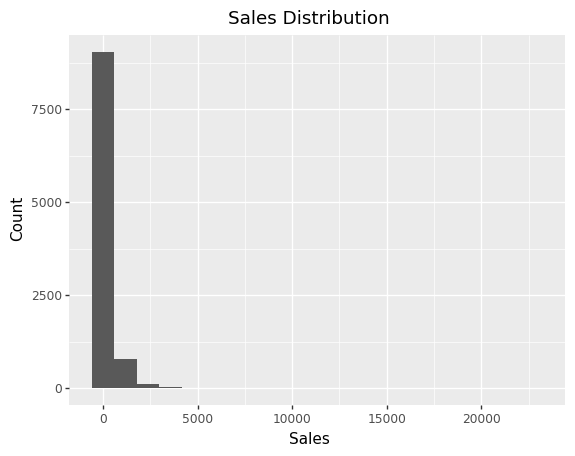

<ggplot: (8770515421189)>

In [316]:
(
    pn.ggplot(df)
    + pn.aes(x="Sales")
    + pn.geom_histogram(bins=20)
    + pn.labs(x="Sales", y="Count", title="Sales Distribution")
)

Sales numbers above 5000 are outliers, so it is easier to check values under 5000 only


In [317]:
df.loc[df["Sales"]>5000]["Row ID"].count()

19

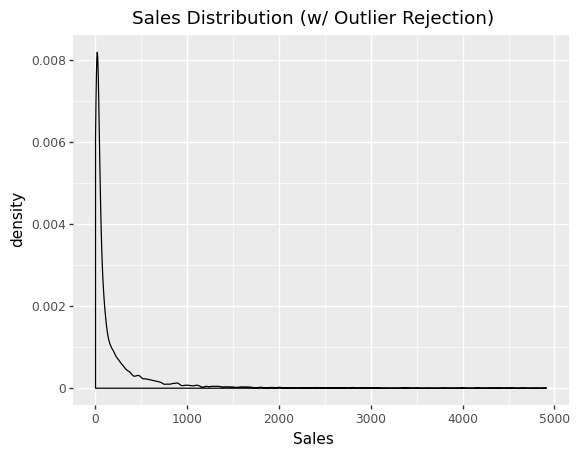

<ggplot: (8770514453949)>

In [318]:
(
    pn.ggplot(df.loc[df["Sales"]<5000])
    + pn.aes(x="Sales")
    + pn.geom_density()
    + pn.labs(x="Sales", title="Sales Distribution (w/ Outlier Rejection)")
)

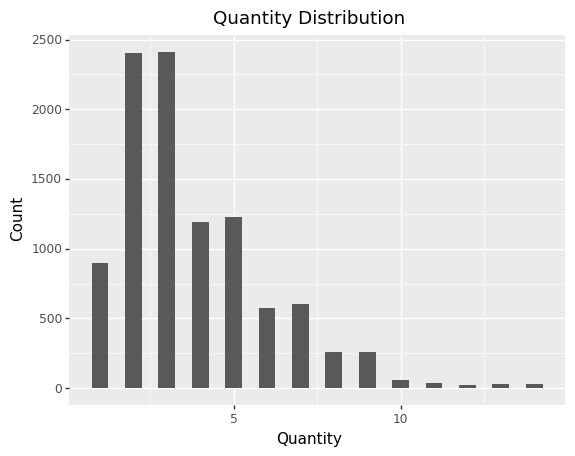

<ggplot: (8770512852133)>

In [319]:
(
    pn.ggplot(df)
    + pn.aes(x="Quantity")
    + pn.geom_histogram(binwidth=0.5)
    + pn.labs(x="Quantity", y="Count", title="Quantity Distribution")
)

In [320]:
df["Discount"].sort_values().value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

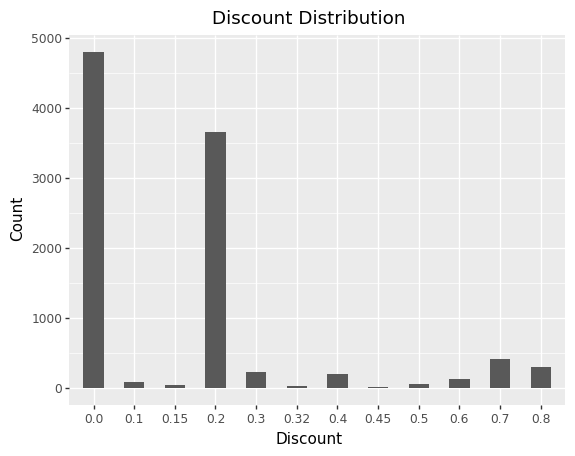

<ggplot: (8770514453977)>

In [321]:
df["Discount"] = pd.Categorical(df["Discount"])
(
    pn.ggplot(df)
    + pn.aes(x="Discount")
    + pn.geom_histogram(binwidth=0.5)
    + pn.labs(x="Discount", y="Count", title="Discount Distribution")
)

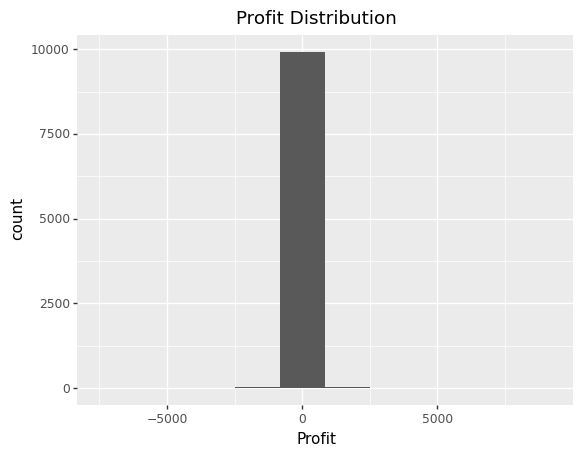

<ggplot: (8770513460401)>

In [322]:
(
    pn.ggplot(df)
    + pn.aes(x="Profit")
    + pn.geom_histogram(bins=10)
    + pn.labs(x="Profit", title="Profit Distribution")
)

Check for outliers:

In [323]:
df.loc[(df["Profit"] < -250) | (df["Profit"] > 250)]["Row ID"].count() / df["Row ID"].count()

0.044326595957574544

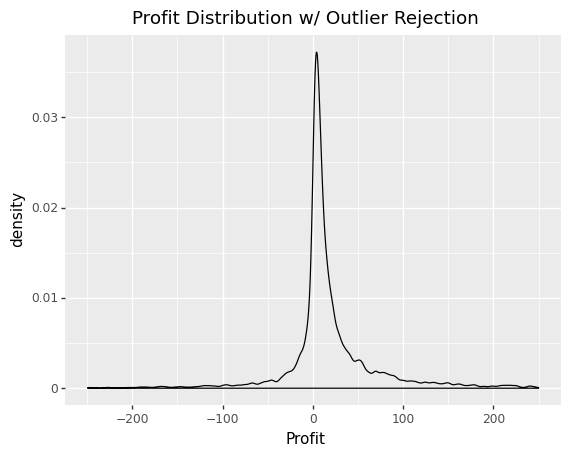

<ggplot: (8770512857517)>

In [324]:
(
    pn.ggplot(df.loc[(df["Profit"] > -250) & (df["Profit"] < 250)])
    + pn.aes(x="Profit")
    + pn.geom_density()
    + pn.labs(x="Profit", title="Profit Distribution w/ Outlier Rejection")
)

## Correlation Checks

In [325]:
df.corr()

,Row ID,Postal Code,Sales,Quantity,Profit,year,month_num,dayofweek_num,ship_mode_num,Segment_num,Category_num,Sub-Category_num
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.012497,0.015430,-0.018732,-0.039364,0.010468,0.014058,-0.004565,0.001399
Postal Code,0.009671,1.000000,-0.023854,0.012761,-0.029961,0.004299,0.026234,0.002269,-0.011337,-0.010772,-0.002331,0.004707
Sales,-0.001359,-0.023854,1.000000,0.200795,0.479064,-0.009679,-0.000625,-0.009343,-0.003224,0.010866,0.040077,-0.012384
Quantity,-0.004016,0.012761,0.200795,1.000000,0.066253,-0.005810,0.023355,-0.002099,0.024864,0.008130,-0.003619,-0.003298
Profit,0.012497,-0.029961,0.479064,0.066253,1.000000,0.004670,-0.000502,0.000200,-0.005767,0.013355,0.091506,0.080734
year,0.015430,0.004299,-0.009679,-0.005810,0.004670,1.000000,-0.020183,0.052432,-0.040434,0.040803,0.005219,0.002217
month_num,-0.018732,0.026234,-0.000625,0.023355,-0.000502,-0.020183,1.000000,0.010870,-0.016907,-0.024712,-0.012977,0.000616
dayofweek_num,-0.039364,0.002269,-0.009343,-0.002099,0.000200,0.052432,0.010870,1.000000,-0.045786,0.008477,0.014266,0.009985
ship_mode_num,0.010468,-0.011337,-0.003224,0.024864,-0.005767,-0.040434,-0.016907,-0.045786,1.000000,0.003023,-0.001085,-0.004128
Segment_num,0.014058,-0.010772,0.010866,0.008130,0.013355,0.040803,-0.024712,0.008477,0.003023,1.000000,0.010123,0.014145


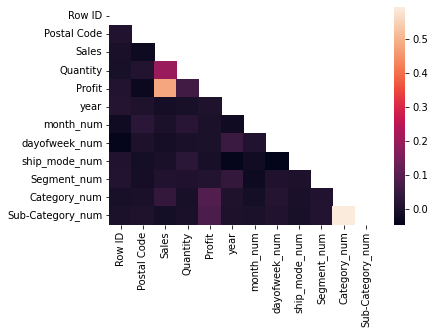

In [327]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=False, mask=mask)

Pairs with significant correlation: \
Sales, Profit\
Sales, Quantity\
Category_num, Sub-Category_num *(this correlatoin isn't relevant: every subcategory implies a particular category, which makes them highly correlated)*

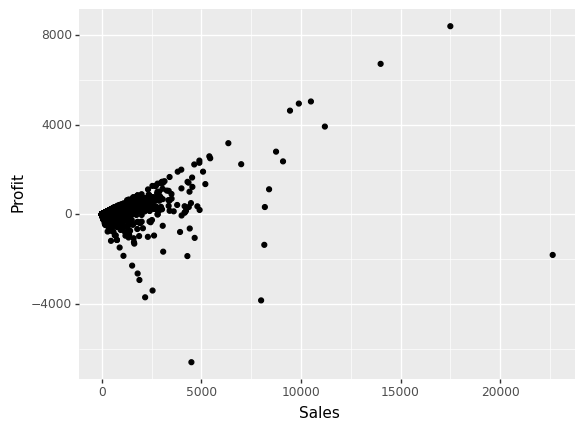

<ggplot: (8770514368401)>

In [329]:
(
    pn.ggplot(df)
    + pn.aes(x="Sales", y="Profit")
    + pn.geom_point()
)

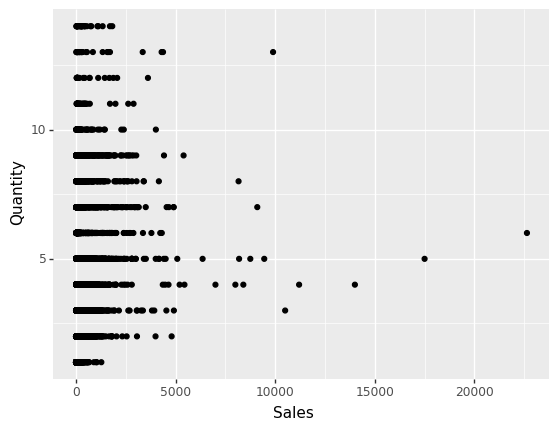

<ggplot: (8770514263001)>

In [330]:
(
    pn.ggplot(df)
    + pn.aes(x="Sales", y="Quantity")
    + pn.geom_point()
)